### Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.datasets import load_boston
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder

# EDA

In [2]:
df = pd.read_csv('Base de Dados - Questionário.xlsx - Sheet1.csv')
df = df.drop(df.columns[0:2], axis=1)
df

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,12/10/2018
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,4/25/2019
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,7/17/2019
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,4/10/2018
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,1/21/2019
...,...,...,...,...,...,...,...,...
32748,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,12/2/2018
32749,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,12/5/2018
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,8/1/2019
32751,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,11/25/2019


In [3]:
PUnique = df.ProductID.unique()
len(PUnique)

73

In [4]:
df.ProductID.value_counts()

002ec297b1b00fb9dde7ee6ac24b67713    966
002d4ea7c04739c130bb74d7e7cd16943    963
001c5d71ac6ad696d22315953758fa043    944
0011c512eb256aa0dbbb544d8dffcf6e3    940
0030026a6ddb3b2d1d4bc225b4b4c4da3    939
                                    ... 
00088930e925c41fd95ebfe695fd26552    205
00210e41887c2a8ef9f791ebc780cc362    204
002ec297b1b00fb9dde7ee6ac24b67711    202
002552c0663708129c0019cc97552d7d2    200
001b237c0e9bb435f2e54071129237e92    197
Name: ProductID, Length: 73, dtype: int64

In [5]:
df_name = pd.read_csv("Base de Dados - Questionário.xlsx - Sheet2.csv")
df_name

,ID,Name,Size
0,00066f42aeeb9f3007548bb9d3f33c381,Capitão América,P
1,00066f42aeeb9f3007548bb9d3f33c382,Capitão América,M
2,00066f42aeeb9f3007548bb9d3f33c383,Capitão América,G
3,00088930e925c41fd95ebfe695fd26551,Thor,P
4,00088930e925c41fd95ebfe695fd26552,Thor,M
...,...,...,...
68,0030e635639c898b323826589761cf233,Rick Morty,G
69,003128f981470c3e5a2e7445e4a771cd1,Homer Simpsons,P
70,003128f981470c3e5a2e7445e4a771cd2,Homer Simpsons,M
71,003128f981470c3e5a2e7445e4a771cd3,Homer Simpsons,G


In [6]:
df_name.loc[ df_name['Name'] ==  "Iron Man"]

,ID,Name,Size
57,002d4ea7c04739c130bb74d7e7cd16941,Iron Man,P
58,002d4ea7c04739c130bb74d7e7cd16942,Iron Man,M
59,002d4ea7c04739c130bb74d7e7cd16943,Iron Man,G


# Transform

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         32753 non-null  object
 1   ProductID  32753 non-null  object
 2   ClientID   32753 non-null  int64 
 3   Discount   32753 non-null  object
 4   UnitPrice  32753 non-null  object
 5   Quantity   32753 non-null  int64 
 6   StoreID    32753 non-null  int64 
 7   Date       32753 non-null  object
dtypes: int64(3), object(5)
memory usage: 2.0+ MB


In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
0,80260d682079b6090c8285b398c50d97,002552c0663708129c0019cc97552d7d3,14001,"0,08","249,2",1,4,2018-12-10
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,"0,1","162,4",1,4,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,"0,1","194,6",1,4,2019-07-17
3,7180475b60fe6bbbde424d39704a1177,001b72dfd63e9833e8c02742adf472e33,14002,"0,1","201,6",2,1,2018-04-10
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,"0,1",406,1,1,2019-01-21
...,...,...,...,...,...,...,...,...
32748,b155e2a8589d40bc9c0381ee48e3204f,002ec297b1b00fb9dde7ee6ac24b67712,28694,"0,08","218,4",1,4,2018-12-02
32749,abb71d0110c4be1a1a0c52f929cab4a3,002d4ea7c04739c130bb74d7e7cd16943,28694,"0,08",210,1,4,2018-12-05
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,"0,08","148,4",1,4,2019-08-01
32751,ee00fa5093eb96d8573403b382fb60a8,002ec297b1b00fb9dde7ee6ac24b67713,28694,"0,1","218,4",2,4,2019-11-25


In [10]:
df.Discount = df.Discount.str.replace(',', '.')
df.UnitPrice = df.UnitPrice.str.replace(',', '.')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         32753 non-null  object        
 1   ProductID  32753 non-null  object        
 2   ClientID   32753 non-null  int64         
 3   Discount   32753 non-null  object        
 4   UnitPrice  32753 non-null  object        
 5   Quantity   32753 non-null  int64         
 6   StoreID    32753 non-null  int64         
 7   Date       32753 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 2.0+ MB


In [11]:
df.Discount = pd.to_numeric(df.Discount)
df.UnitPrice = pd.to_numeric(df.UnitPrice)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32753 entries, 0 to 32752
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   ID         32753 non-null  object        
 1   ProductID  32753 non-null  object        
 2   ClientID   32753 non-null  int64         
 3   Discount   32753 non-null  float64       
 4   UnitPrice  32753 non-null  float64       
 5   Quantity   32753 non-null  int64         
 6   StoreID    32753 non-null  int64         
 7   Date       32753 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 2.0+ MB


In [12]:
df_2019 = df.loc[df.Date > np.datetime64('2018-12-31')]
df_2019 = df_2019.loc[df_2019.Date < np.datetime64('2020-01-01')]


In [13]:
df_2019

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date
1,3275736da1234f55d52bdf09d86b93bc,001b237c0e9bb435f2e54071129237e93,14001,0.10,162.4,1,4,2019-04-25
2,f3513eec8f1434b5b7e04ddf3598df40,00066f42aeeb9f3007548bb9d3f33c381,14001,0.10,194.6,1,4,2019-07-17
4,76600853a200fe87e141adae6b35674c,00210e41887c2a8ef9f791ebc780cc363,14002,0.10,406.0,1,1,2019-01-21
5,7ab64f42a8f9ab290e920eed320d7e60,002552c0663708129c0019cc97552d7d3,14002,0.10,249.2,1,1,2019-03-28
6,b35a771164a9defa3b4767f1b66918b1,002959d7a0b0990fe2d69988affcbc803,14002,0.08,261.8,1,1,2019-08-14
...,...,...,...,...,...,...,...,...
32733,0d8ac7eb8e52447e022b8e4a30ff6394,002d4ea7c04739c130bb74d7e7cd16943,28689,0.10,210.0,1,9,2019-11-23
32739,18a83c7532fc2dc3a10fd55ff3655588,0011c512eb256aa0dbbb544d8dffcf6e1,19615,0.10,204.4,1,1,2019-02-20
32740,d105b386fa5b4aab107c43ba2760f64b,002552c0663708129c0019cc97552d7d3,19619,0.08,249.2,1,4,2019-08-29
32750,db9a034f34174edd577b9f64cc982952,001795ec6f1b187d37335e1c4704762e3,28694,0.08,148.4,1,4,2019-08-01


# Estatisitcas

###  Produto mais vendido

<AxesSubplot:xlabel='Date'>

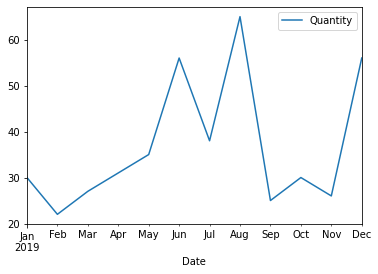

In [14]:
data = df.loc[df['ProductID'] == '002d4ea7c04739c130bb74d7e7cd16943'] 
data = data.drop(['ID', 'ProductID', 'ClientID', 'Discount', 'UnitPrice', 'StoreID'], axis=1)
data = data.loc[data.Date > np.datetime64('2019-01-01')]
data = data.loc[data.Date < np.datetime64('2020-01-01')]
data = data.groupby(pd.Grouper(key='Date', freq='M')).sum()
data.plot()

### Faturamento

In [15]:
df_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
ClientID,14768.0,21214.847779,4272.755230,14001.00,17524.00,21120.0,24926.5,28694.0
Discount,14768.0,0.092325,0.009726,0.08,0.08,0.1,0.1,0.1
UnitPrice,14768.0,251.610943,149.231514,114.80,161.00,210.0,249.2,686.0
Quantity,14768.0,1.043608,0.206863,1.00,1.00,1.0,1.0,3.0
StoreID,14768.0,3.759412,3.870685,1.00,1.00,3.0,4.0,22.0


In [16]:
venda = df_2019.UnitPrice - (df_2019.Discount * df_2019.UnitPrice)
df_2019['lucro'] = venda * df_2019.Quantity

In [17]:
df.columns

Index(['ID', 'ProductID', 'ClientID', 'Discount', 'UnitPrice', 'Quantity',
       'StoreID', 'Date'],
      dtype='object')

In [18]:
df_model = df_2019.drop(['ID', 'ProductID', 'ClientID', 'Discount','StoreID'], axis=1)
df_model = df_model.groupby(pd.Grouper(key='Date', freq='M')).sum()
df_model.describe().T

,count,mean,std,min,25%,50%,75%,max
UnitPrice,12.0,309649.200000,99616.642504,178669.40,256883.200,273622.30,341443.550,471296.000
Quantity,12.0,1284.333333,431.467124,834.00,1049.750,1073.50,1371.250,2035.000
lucro,12.0,294265.094667,99304.561130,168483.42,238564.935,257390.91,323938.797,456192.856


In [19]:
df_model

,UnitPrice,Quantity,lucro
Date,,,
2019-01-31,224638.4,1057,210849.660
2019-02-28,178669.4,834,168483.420
2019-03-31,303454.2,1186,285083.820
2019-04-30,277320.4,1078,257972.400
2019-05-31,300983.2,1165,283353.840
2019-06-30,471296.0,1989,454739.992
2019-07-31,263993.8,1028,242757.900
2019-08-31,468384.0,2035,456192.856
2019-09-30,269924.2,1067,256809.420


### Lojas

In [20]:
df_2019.StoreID.unique()

array([ 4,  1,  2,  7,  9,  3, 22], dtype=int64)

In [21]:
loja = df_2019.loc[df.StoreID == 3]
loja

,ID,ProductID,ClientID,Discount,UnitPrice,Quantity,StoreID,Date,lucro
56,525533c5eccb7f4665306a7e01783567,00088930e925c41fd95ebfe695fd26553,14021,0.10,117.6,1,3,2019-02-26,105.840
57,350f47d61d589f6218bff053db95fe62,003128f981470c3e5a2e7445e4a771cd2,14021,0.10,161.0,1,3,2019-04-14,144.900
59,3eb2926661890add37ff467c6c5ead88,003128f981470c3e5a2e7445e4a771cd3,14022,0.10,161.0,1,3,2019-01-30,144.900
60,404840d41d032edfc533e78d6e6ee416,0030e635639c898b323826589761cf232,14022,0.08,190.4,1,3,2019-06-01,175.168
61,2d870e500a9ffcb5c5f0723f198a7e21,002ec297b1b00fb9dde7ee6ac24b67713,14022,0.10,218.4,1,3,2019-09-22,196.560
...,...,...,...,...,...,...,...,...,...
32703,3d5651800efaa81c9c96808ded6f145e,00088930e925c41fd95ebfe695fd26551,28678,0.10,117.6,1,3,2019-09-24,105.840
32726,92692f8437b5bc1db9cc256b4a4cff74,00088930e925c41fd95ebfe695fd26552,28687,0.10,117.6,1,3,2019-03-30,105.840
32727,d17cd10dbb5981e9a2ba4739a202da55,002c6dab60557c48cfd6c2222ef7fd762,28687,0.08,148.4,1,3,2019-08-29,136.528
32728,bd3b1eb371dd6c8ca77447b363de08cd,00250175f79f584c14ab5cecd80553cd1,28687,0.10,686.0,1,3,2019-09-08,617.400


<AxesSubplot:xlabel='Date'>

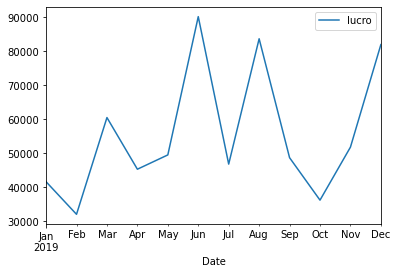

In [22]:
data = loja
data = data.drop(['ProductID','ClientID', 'StoreID', 'Quantity','Discount','UnitPrice'], axis=1)
data = data.groupby(pd.Grouper(key='Date', freq='m')).sum()
data.plot()

In [23]:
data.sum()

lucro    668055.752
dtype: float64